<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B74REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#подготовка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/cars_dataset.csv', delimiter = ',')
data = data.drop(columns='Unnamed: 0')
data

,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,...,Consumption,Engine_Power,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,black,0.0,...,9.8,NaN,0.0,2018.0,2020.0,667.0,1941.0,11.5,9.2,9.8
1,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,green,0.0,...,9.6,NaN,0.0,2018.0,2020.0,667.0,1941.0,10.8,8.9,9.6
2,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,15500.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
3,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,0.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
4,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,gray,15297.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22697,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,silver,180000.0,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22698,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,gray,141000.0,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7
22699,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,black,222000.0,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22700,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,black,165000.0,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7


дропаем аномально дорогие тачки

In [ ]:
data = data.drop(data[data['Price'] > 40000000].index)
data

,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,...,Consumption,Engine_Power,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,black,0.0,...,9.8,NaN,0.0,2018.0,2020.0,667.0,1941.0,11.5,9.2,9.8
1,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,green,0.0,...,9.6,NaN,0.0,2018.0,2020.0,667.0,1941.0,10.8,8.9,9.6
2,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,15500.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
3,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,0.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
4,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,gray,15297.0,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22697,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,silver,180000.0,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22698,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,gray,141000.0,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7
22699,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,black,222000.0,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22700,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,black,165000.0,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7


смотрм сколько нан значений

In [ ]:
data.isna().sum()

,0
mark,0
Box,0
Drive_unit,0
Seats,0
Doors,0
Country,0
Engine,0
Volume,0
Color,0
Mileage,0


создаем списоок столбцов

In [ ]:
cols = data.columns
cols

Index(['mark', 'Box', 'Drive_unit', 'Seats', 'Doors', 'Country', 'Engine',
       'Volume', 'Color', 'Mileage', 'Price', 'Year', 'Car_type', 'Generation',
       'Model', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_brakes',
       'Engine_volume', 'Width', 'Front_Suspension_type',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Car_class', 'Wheelbase', 'Cylinders', 'Height', 'Fuel', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Engine_Location',
       'Maximum_speed', 'Wheel_size', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption', 'Engine_Power',
       'Restyling', 'Release_start_series', 'End_Serial', 'Trunk_volume_max',
       'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

In [ ]:
data.describe()

,Seats,Doors,Volume,Mileage,Price,Year,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,Maximum_power,...,Compression_ratio,Consumption,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
count,22697.000000,22697.000000,22697.000000,22697.000000,2.269700e+04,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,...,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000
mean,5.012821,4.418954,2.334176,136678.916553,1.335699e+06,2009.206151,2336.461135,1813.365950,73.526354,179.342160,...,11.149774,7.153813,0.339869,2006.612019,2011.684231,472.197691,854.137639,8.730453,5.339882,6.605124
std,0.763184,0.810117,1.048005,101146.151699,2.097821e+06,9.108693,1036.637617,98.724445,27.943287,103.770128,...,2.438261,3.638873,0.473675,10.334073,8.277452,321.693815,937.411980,5.342818,3.119245,3.927792
min,1.000000,0.000000,0.000000,0.000000,2.000000e+04,1927.000000,599.000000,1275.000000,0.000000,0.000000,...,5.800000,0.000000,0.000000,1927.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,1.600000,62343.000000,3.730000e+05,2006.000000,1598.000000,1755.000000,77.000000,114.000000,...,10.000000,6.100000,0.000000,2003.000000,2008.000000,352.000000,0.000000,6.900000,4.700000,5.600000
50%,5.000000,5.000000,2.000000,125000.000000,6.800000e+05,2011.000000,1997.000000,1810.000000,82.000000,150.000000,...,10.500000,7.400000,0.000000,2008.000000,2013.000000,456.000000,815.000000,9.400000,5.800000,7.200000
75%,5.000000,5.000000,2.700000,191800.000000,1.420000e+06,2015.000000,2693.000000,1875.000000,86.200000,218.000000,...,11.149437,9.100000,1.000000,2013.000000,2018.000000,530.000000,1547.000000,11.700000,7.100000,8.800000
max,9.000000,5.000000,8.100000,1000000.000000,3.321500e+07,2020.000000,8128.000000,2360.000000,108.000000,762.000000,...,23.000000,28.200000,1.000000,2020.000000,2020.000000,5800.000000,9300.000000,36.200000,21.100000,28.200000


смотрим на типы данных всех столбцов и понимаем что оставим 35

In [ ]:
count = 0
for col in data.columns:
  print(count, col+':', data[col].dtypes)
  count += 1

0 mark: object
1 Box: object
2 Drive_unit: object
3 Seats: float64
4 Doors: float64
5 Country: object
6 Engine: object
7 Volume: float64
8 Color: object
9 Mileage: float64
10 Price: float64
11 Year: float64
12 Car_type: object
13 Generation: object
14 Model: object
15 Drive: object
16 Boost_type: object
17 Cylinder_location: object
18 Front_brakes: object
19 Engine_volume: float64
20 Width: float64
21 Front_Suspension_type: object
22 Diameter_cylinder_and_stroke_piston: float64
23 Maximum_power: float64
24 Length: float64
25 Car_class: object
26 Wheelbase: float64
27 Cylinders: float64
28 Height: float64
29 Fuel: object
30 Torque: float64
31 Valves_per_cylinder: float64
32 Volume_fuel_tank: float64
33 Rear_track_width: float64
34 Front_track_width: float64
35 Curb_weight_kg: float64
36 Clearance: float64
37 Engine_Location: object
38 Maximum_speed: float64
39 Wheel_size: object
40 Transmissions: float64
41 Speed_to_100: float64
42 Full_weight: float64
43 Compression_ratio: float64
44 C

In [ ]:
data.columns

Index(['mark', 'Box', 'Drive_unit', 'Seats', 'Doors', 'Country', 'Engine',
       'Volume', 'Color', 'Mileage', 'Price', 'Year', 'Car_type', 'Generation',
       'Model', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_brakes',
       'Engine_volume', 'Width', 'Front_Suspension_type',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Car_class', 'Wheelbase', 'Cylinders', 'Height', 'Fuel', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Engine_Location',
       'Maximum_speed', 'Wheel_size', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption', 'Engine_Power',
       'Restyling', 'Release_start_series', 'End_Serial', 'Trunk_volume_max',
       'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

In [ ]:
colsToDrop = []

дропаем нечисловые столбцы

In [ ]:
for col in data.columns:
  if data[col].dtypes == object:
    colsToDrop.append(col)
data = data.drop(columns = colsToDrop)
data

,Seats,Doors,Volume,Mileage,Price,Year,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,Maximum_power,...,Compression_ratio,Consumption,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,5.0,5.0,2.9,0.0,12902800.0,2020.0,2925.0,1931.0,0.0,249.0,...,15.5,9.8,0.0,2018.0,2020.0,667.0,1941.0,11.5,9.2,9.8
1,5.0,5.0,2.9,0.0,15709500.0,2020.0,2925.0,1931.0,82.0,330.0,...,15.5,9.6,0.0,2018.0,2020.0,667.0,1941.0,10.8,8.9,9.6
2,5.0,5.0,4.0,15500.0,13890000.0,2019.0,3982.0,1931.0,83.0,422.0,...,10.5,12.1,0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
3,5.0,5.0,4.0,0.0,13116000.0,2020.0,3982.0,1931.0,83.0,422.0,...,10.5,12.1,0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
4,5.0,5.0,4.0,15297.0,11450000.0,2019.0,3982.0,1931.0,83.0,422.0,...,10.5,12.1,0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22697,5.0,4.0,2.4,180000.0,300000.0,2008.0,2360.0,1843.0,88.0,172.0,...,10.5,8.9,0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22698,5.0,4.0,2.7,141000.0,330000.0,2008.0,2736.0,1843.0,86.0,189.0,...,9.9,10.7,0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7
22699,5.0,4.0,2.4,222000.0,654000.0,2007.0,2360.0,1843.0,88.0,172.0,...,10.5,8.9,0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22700,5.0,4.0,2.7,165000.0,500000.0,2008.0,2736.0,1843.0,86.0,189.0,...,9.9,10.7,0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7


еще раз проверяем что все столбцы числовые

In [ ]:
count = 0
for col in data.columns:
  print(count, col+':', data[col].dtypes)
  count += 1

0 Seats: float64
1 Doors: float64
2 Volume: float64
3 Mileage: float64
4 Price: float64
5 Year: float64
6 Engine_volume: float64
7 Width: float64
8 Diameter_cylinder_and_stroke_piston: float64
9 Maximum_power: float64
10 Length: float64
11 Wheelbase: float64
12 Cylinders: float64
13 Height: float64
14 Torque: float64
15 Valves_per_cylinder: float64
16 Volume_fuel_tank: float64
17 Rear_track_width: float64
18 Front_track_width: float64
19 Curb_weight_kg: float64
20 Clearance: float64
21 Maximum_speed: float64
22 Transmissions: float64
23 Speed_to_100: float64
24 Full_weight: float64
25 Compression_ratio: float64
26 Consumption: float64
27 Restyling: float64
28 Release_start_series: float64
29 End_Serial: float64
30 Trunk_volume_max: float64
31 Trunk_volume_min: float64
32 Expense_city: float64
33 Expense_track: float64
34 Consumption_average: float64


таргетнуб переменную в отдельный дф

In [ ]:
y = data['Price']
x = data.drop(columns = 'Price')
x.columns

Index(['Seats', 'Doors', 'Volume', 'Mileage', 'Year', 'Engine_volume', 'Width',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Wheelbase', 'Cylinders', 'Height', 'Torque', 'Valves_per_cylinder',
       'Volume_fuel_tank', 'Rear_track_width', 'Front_track_width',
       'Curb_weight_kg', 'Clearance', 'Maximum_speed', 'Transmissions',
       'Speed_to_100', 'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling', 'Release_start_series', 'End_Serial', 'Trunk_volume_max',
       'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

стандартизация фич

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.01679984,  0.71725244,  0.53991726, ...,  0.51837956,
         1.23754403,  0.81342043],
       [-0.01679984,  0.71725244,  0.53991726, ...,  0.38735967,
         1.1413648 ,  0.76250012],
       [-0.01679984,  0.71725244,  1.5895534 , ...,  1.00502486,
         1.75049996,  1.39900404],
       ...,
       [-0.01679984, -0.51716359,  0.06280992, ...,  0.66811657,
         0.50016989,  0.58427902],
       [-0.01679984, -0.51716359,  0.34907432, ...,  0.6868337 ,
         1.07724531,  1.04256184],
       [-0.01679984, -0.51716359,  0.34907432, ...,  0.6868337 ,
         1.07724531,  1.04256184]])

In [ ]:
y

,Price
0,12902800.0
1,15709500.0
2,13890000.0
3,13116000.0
4,11450000.0
...,...
22697,300000.0
22698,330000.0
22699,654000.0
22700,500000.0


In [ ]:
y.isna().sum()

0

#метод главных компонент

сделаем 8 главных компонент, так как в дз 2 я выбирал только 8 фич для предсказания. то есть таким образом сможем сравнить есть ли смысл применять метод главных компонент


In [ ]:
comps = 8
pca = PCA(n_components = comps)
pca.fit(x)

PCA(n_components=8)

In [ ]:
pca_data = pca.transform(x)
pca_data

array([[ 4.70115561,  0.90861251,  2.56534959, ..., -2.31200593,
        -1.94101642,  0.12040891],
       [ 6.20216139,  0.80579033,  1.91264782, ..., -0.77924372,
        -1.59138528,  0.39995535],
       [ 7.22785329,  0.19582135,  0.16183252, ..., -1.13036646,
        -0.7237606 , -0.79092014],
       ...,
       [ 0.0235797 , -0.3344847 , -1.18034542, ...,  0.53195139,
         0.36343146, -0.32935596],
       [ 0.98168813, -0.36568734, -2.06462206, ...,  0.14272631,
         0.50693249, -0.62669205],
       [ 0.9428477 , -0.60598879, -2.11982619, ...,  0.5779631 ,
         0.4753513 , -0.59746573]])

стагдартизация таргета

In [ ]:
scaler = StandardScaler()

создание пца датафрейма

In [ ]:
pca_df = pd.DataFrame(data = pca_data, columns = ['PCA-{}'.format(i) for i in range(1, comps + 1)])
pca_df['PCA-Y'] = scaler.fit_transform(pd.DataFrame(y))
pca_df = pca_df.dropna()
pca_df

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-Y
0,4.701156,0.908613,2.565350,1.520399,0.119650,-2.312006,-1.941016,0.120409,5.513987
1,6.202161,0.805790,1.912648,0.857091,2.005938,-0.779244,-1.591385,0.399955,6.851929
2,7.227853,0.195821,0.161833,1.480553,2.746440,-1.130366,-0.723761,-0.790920,5.984581
3,7.245176,0.275707,0.184048,1.477688,2.813183,-1.214733,-0.715290,-0.795316,5.615619
4,7.227916,0.196290,0.161929,1.480458,2.747202,-1.131391,-0.723693,-0.790993,4.821444
...,...,...,...,...,...,...,...,...,...
22692,0.049107,-0.193433,-1.145551,0.435093,-1.313270,0.313800,0.380714,-0.343220,-0.493713
22693,0.989119,-0.310292,-2.053230,0.609548,-0.816665,0.021563,0.514913,-0.635266,-0.479412
22694,0.023580,-0.334485,-1.180345,0.450296,-1.479439,0.531951,0.363431,-0.329356,-0.324963
22695,0.981688,-0.365687,-2.064622,0.620723,-0.906710,0.142726,0.506932,-0.626692,-0.398374


In [ ]:
pca_df.isna().sum()

,0
PCA-1,0
PCA-2,0
PCA-3,0
PCA-4,0
PCA-5,0
PCA-6,0
PCA-7,0
PCA-8,0
PCA-Y,0


объясненная дисперсия


In [ ]:
# Получение собственных значений
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3492427 , 0.12301924, 0.09946151, 0.08900573, 0.03669122,
       0.03375165, 0.03030621, 0.02885915])

смотрим насколько важен каждый компонент

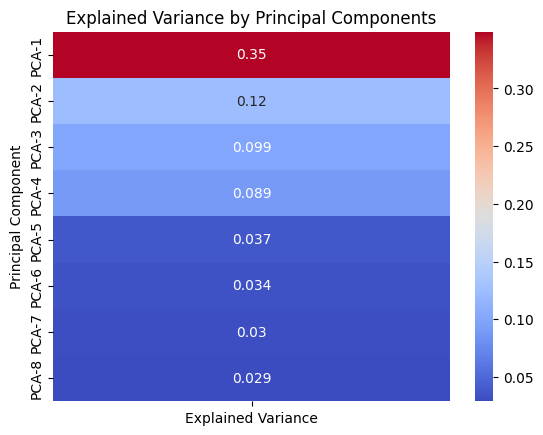

In [ ]:
explained_variance_df = pd.DataFrame({
    'Principal Component': ['PCA-{}'.format(i+1) for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

# Визуализация с подсветкой
sns.heatmap(explained_variance_df.set_index('Principal Component'), annot=True, cmap='coolwarm', cbar=True)
plt.title('Explained Variance by Principal Components')
plt.show()

смотрим соотношение первых двух главных компонент

<ipython-input-758-b781766befd5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



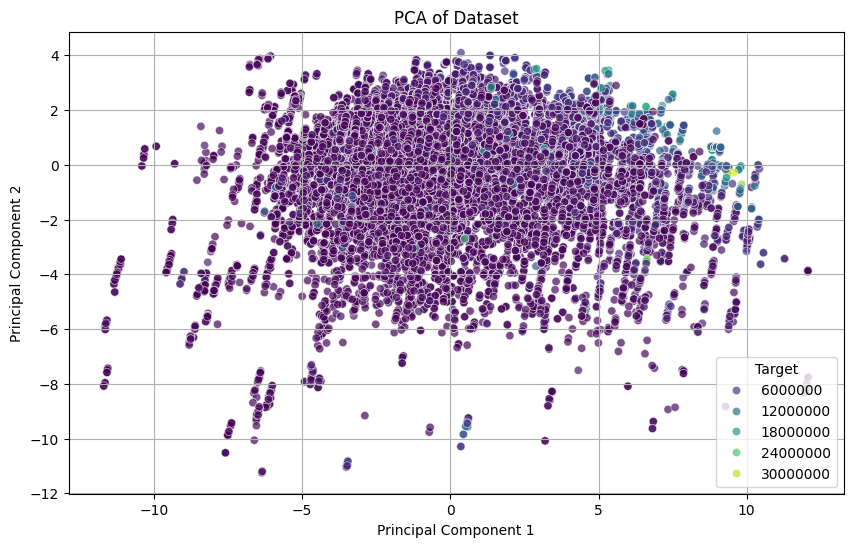

In [ ]:
# Создание DataFrame для первых двух главных компонент
pca_df1_2 = pca_df.iloc[:, :2]
pca_df1_2['target'] = y

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df1_2, x='PCA-1', y='PCA-2', hue='target', palette='viridis', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid()
plt.show()

видим, что более дорогие а\м находятся в правом верхнем углу и чем они дороже, тем их меньше

корреляция изначальных признаков с таргетом


In [ ]:
corMat = data.corr()
targetCor = corMat['Price'].to_frame(name='PriceCorrelation')
targetCor = targetCor.sort_values(by = 'PriceCorrelation', ascending = False, key = abs)
targetCor.style.background_gradient(vmin=-1, vmax=1)

,PriceCorrelation
Price,1.000000
Torque,0.633160
Maximum_power,0.628326
Transmissions,0.541840
Width,0.461389
Curb_weight_kg,0.442603
Front_track_width,0.434158
Maximum_speed,0.431356
Rear_track_width,0.427705
Cylinders,0.416429


ну тут все видно по табличке, самые интересные нам фичи наверху


корреляция главных компонент с тагретом

In [ ]:
corMat = pca_df.corr()
targetCor = corMat['PCA-Y'].to_frame(name='PriceCorrelation')
targetCor = targetCor.sort_values(by = 'PriceCorrelation', ascending = False, key = abs)
targetCor.style.background_gradient(vmin=-1, vmax=1)

,PriceCorrelation
PCA-Y,1.000000
PCA-1,0.538064
PCA-6,-0.246346
PCA-4,-0.222391
PCA-5,0.221255
PCA-2,0.171147
PCA-7,-0.060596
PCA-3,-0.031731
PCA-8,-0.019208


#Модель

трейн тест для модели

In [ ]:
PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test = train_test_split(pca_df.drop(columns = 'PCA-Y'), pca_df['PCA-Y'], train_size=0.8, random_state = 42)
print(PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test)

          PCA-1     PCA-2     PCA-3     PCA-4     PCA-5     PCA-6     PCA-7  \
1372  -2.202116  2.655870 -0.068873  0.506611  0.477162 -0.568931  1.144188   
2753  -2.228030 -0.044595  1.011147 -2.660487 -2.875615 -1.255589 -0.335261   
8689   0.563924 -0.034283 -2.197886 -0.256506 -0.805158  0.528615 -0.149713   
3335  -2.026313  0.815864  0.424241 -2.876980 -2.464701 -2.229880  0.535889   
14753  2.302691 -1.012510 -2.309269  0.130337 -0.986085  1.170604  0.320653   
...         ...       ...       ...       ...       ...       ...       ...   
11964  2.494879 -3.650168  1.237099 -3.337842  2.030425  1.128810  0.572441   
21575 -3.619390 -2.751674 -0.550464 -1.697420 -1.666790  2.345438  0.314582   
5390   5.092300 -2.423437 -0.267425  2.316387  0.298689  1.004758 -0.224551   
860    1.916715  0.949248  3.618755 -2.551325  1.918155 -0.329370  0.155376   
15795 -2.678736  0.609612  0.154146  1.153784  0.629219  0.037138  0.197912   

          PCA-8  
1372   0.997654  
2753  -1.212019

предсказание

In [ ]:
PCA_model = LinearRegression().fit(PCA_x_train, PCA_y_train)
PCA_predict = PCA_model.predict(PCA_x_test)
PCA_predict

array([ 0.62796353, -0.03033394, -0.4848625 , ...,  0.25375679,
        0.7187785 ,  0.28520858])

коэффициенты

In [ ]:
PCA_model.coef_

array([ 0.1561093 ,  0.08583689, -0.01520295, -0.12834796,  0.19490199,
       -0.22536259, -0.06000896, -0.01893697])

метрика ошибок


In [ ]:
mse = mean_squared_error(PCA_y_test, PCA_predict)
print('mse:', mse)

mse: 0.5749265609701439


результаты, конечно, не самые впечатляющие. Но, в таком случае, попробуем добавить еще компонентов

In [ ]:
def plot_line(x,y,title_x = '', title_y = '', ):
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        opacity=0.7,
        marker=dict(size = 5,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=1
            )),

        )
    )
    fig.update_layout(
            width=1000,
            height=600,
            xaxis_title=title_x,
            yaxis_title=title_y,
            yaxis_type = "log",
        template = "plotly_dark"
            )


    fig.show()


In [ ]:
plot_line(np.array(range(len(explained_variance)))+1,
          np.cumsum(explained_variance))

не знаю есть ли смысл смотреть эти графики на таком малом числе компонентов, но тут кажется, что нужно 4

In [ ]:
plot_line(np.array(range(len(explained_variance)))+1,
          explained_variance)

тут пожалуй можно и 5

#Попытка два

11 компонентов были подобраны по методу локтя при 33 коммпонентов.

In [ ]:
compsNew = 11
pcaNew = PCA(n_components = compsNew)
pcaNew.fit(x)

PCA(n_components=11)

In [ ]:
pca_dataNew = pcaNew.transform(x)
pca_dataNew

array([[ 4.70115561,  0.90861251,  2.56534959, ..., -0.2667272 ,
        -2.07151235,  0.56394077],
       [ 6.20216139,  0.80579033,  1.91264782, ..., -1.6868588 ,
        -0.83745245, -0.21609977],
       [ 7.22785329,  0.19582135,  0.16183252, ..., -0.36381594,
        -0.84034139,  0.06411183],
       ...,
       [ 0.0235797 , -0.3344847 , -1.18034542, ..., -0.42480952,
         0.69953458,  1.21027747],
       [ 0.98168813, -0.36568734, -2.06462206, ..., -0.18542163,
         0.55186186,  0.92209894],
       [ 0.9428477 , -0.60598879, -2.11982619, ..., -0.18711036,
         0.37586446,  0.94562495]])

In [ ]:
pca_dfNew = pd.DataFrame(data = pca_dataNew, columns = ['PCA-{}'.format(i) for i in range(1, compsNew + 1)])
pca_dfNew['PCA-Y'] = scaler.fit_transform(pd.DataFrame(y))
pca_dfNew = pca_dfNew.dropna()
pca_dfNew

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,PCA-11,PCA-Y
0,4.701156,0.908613,2.565350,1.520399,0.119650,-2.312006,-1.941016,0.120409,-0.266727,-2.071512,0.563941,5.513987
1,6.202161,0.805790,1.912648,0.857091,2.005938,-0.779244,-1.591385,0.399955,-1.686859,-0.837452,-0.216100,6.851929
2,7.227853,0.195821,0.161833,1.480553,2.746440,-1.130366,-0.723761,-0.790920,-0.363816,-0.840341,0.064112,5.984581
3,7.245176,0.275707,0.184048,1.477688,2.813183,-1.214733,-0.715290,-0.795316,-0.362714,-0.801109,0.064852,5.615619
4,7.227916,0.196290,0.161929,1.480458,2.747202,-1.131391,-0.723693,-0.790993,-0.363814,-0.839942,0.064041,4.821444
...,...,...,...,...,...,...,...,...,...,...,...,...
22692,0.049107,-0.193433,-1.145551,0.435093,-1.313270,0.313800,0.380714,-0.343220,-0.423484,0.790915,1.201765,-0.493713
22693,0.989119,-0.310292,-2.053230,0.609548,-0.816665,0.021563,0.514913,-0.635266,-0.185219,0.599090,0.913719,-0.479412
22694,0.023580,-0.334485,-1.180345,0.450296,-1.479439,0.531951,0.363431,-0.329356,-0.424810,0.699535,1.210277,-0.324963
22695,0.981688,-0.365687,-2.064622,0.620723,-0.906710,0.142726,0.506932,-0.626692,-0.185422,0.551862,0.922099,-0.398374


In [ ]:
explained_varianceNew = pcaNew.explained_variance_ratio_
explained_varianceNew

array([0.3492427 , 0.12301924, 0.09946151, 0.08900573, 0.03669122,
       0.03375165, 0.03030621, 0.02885915, 0.02728536, 0.02329165,
       0.02187475])

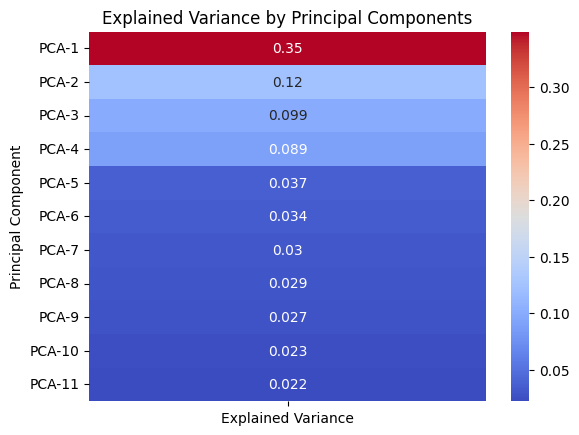

In [ ]:
explained_variance_dfNew = pd.DataFrame({
    'Principal Component': ['PCA-{}'.format(i+1) for i in range(len(explained_varianceNew))],
    'Explained Variance': explained_varianceNew
})

# Визуализация с подсветкой
sns.heatmap(explained_variance_dfNew.set_index('Principal Component'), annot=True, cmap='coolwarm', cbar=True)
plt.title('Explained Variance by Principal Components')
plt.show()

In [ ]:
corMatNew = pca_dfNew.corr()
targetCorNew = corMatNew['PCA-Y'].to_frame(name='PriceCorrelation17')
targetCorNew = targetCorNew.sort_values(by = 'PriceCorrelation17', ascending = False, key = abs)
targetCorNew.style.background_gradient(vmin=-1, vmax=1)

,PriceCorrelation17
PCA-Y,1.000000
PCA-1,0.538064
PCA-6,-0.246346
PCA-4,-0.222391
PCA-5,0.221255
PCA-2,0.171147
PCA-11,-0.134154
PCA-7,-0.060596
PCA-3,-0.031731
PCA-8,-0.019208


In [ ]:
PCA_x_trainNew, PCA_x_testNew, PCA_y_trainNew, PCA_y_testNew = train_test_split(pca_dfNew.drop(columns = 'PCA-Y'), pca_dfNew['PCA-Y'], train_size=0.8, random_state = 42)
print(PCA_x_trainNew, PCA_x_testNew, PCA_y_trainNew, PCA_y_testNew)

          PCA-1     PCA-2     PCA-3     PCA-4     PCA-5     PCA-6     PCA-7  \
1372  -2.202116  2.655870 -0.068873  0.506611  0.477162 -0.568931  1.144188   
2753  -2.228030 -0.044595  1.011147 -2.660487 -2.875615 -1.255589 -0.335261   
8689   0.563924 -0.034283 -2.197886 -0.256506 -0.805158  0.528615 -0.149713   
3335  -2.026313  0.815864  0.424241 -2.876980 -2.464701 -2.229880  0.535889   
14753  2.302691 -1.012510 -2.309269  0.130337 -0.986085  1.170604  0.320653   
...         ...       ...       ...       ...       ...       ...       ...   
11964  2.494879 -3.650168  1.237099 -3.337842  2.030425  1.128810  0.572441   
21575 -3.619390 -2.751674 -0.550464 -1.697420 -1.666790  2.345438  0.314582   
5390   5.092300 -2.423437 -0.267425  2.316387  0.298689  1.004758 -0.224551   
860    1.916715  0.949248  3.618755 -2.551325  1.918155 -0.329370  0.155376   
15795 -2.678736  0.609612  0.154146  1.153784  0.629219  0.037138  0.197912   

          PCA-8     PCA-9    PCA-10    PCA-11  
137

In [ ]:
PCA_modelNew = LinearRegression().fit(PCA_x_trainNew, PCA_y_trainNew)
PCA_predictNew = PCA_modelNew.predict(PCA_x_testNew)
PCA_predictNew

array([ 0.65345182,  0.01763429, -0.40984204, ...,  0.35767683,
        0.86508373,  0.52927539])

In [ ]:
PCA_modelNew.coef_

array([ 0.15615088,  0.0857048 , -0.01538388, -0.12786338,  0.19520113,
       -0.2253399 , -0.05960646, -0.01807907, -0.00646606,  0.01195839,
       -0.15577185])

In [ ]:
mseNew = mean_squared_error(PCA_y_testNew, PCA_predictNew)
print('mse:', mseNew)

mse: 0.5573492548474426


результат чуть получше


In [ ]:
plot_line(np.array(range(len(explained_varianceNew)))+1,
          np.cumsum(explained_varianceNew))

In [ ]:
plot_line(np.array(range(len(explained_varianceNew)))+1,
          explained_varianceNew)

по этим двум графикам тоже примерно 4-5 самых важных компонентов

#Вывод

По методу локтя нашли самые важные компоненты и попробовали применить метод PCA для линейной регрессии и решить задачу регрессии. MSE оказался намного хуже чем без pca. Адекватное число главных компонент - 11, результат не сильно плохой, но и далее растет по чуть чуть.
